In [1]:
from os import listdir
from keras.wrappers.scikit_learn import KerasClassifier
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
#from keras.preprocessing.image import load_img
#from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import cv2
from glob import glob
import os
from sklearn.preprocessing import MinMaxScaler
from sys import path
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, AveragePooling2D, GlobalMaxPooling2D
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D , MaxPooling2D
from tensorflow.keras.optimizers import RMSprop, Adam, Adadelta
from keras.layers import Input
from keras.models import Model
from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import MaxPooling2D
from sklearn.metrics import mean_squared_error
import keras.backend as K
from keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Conv2DTranspose , Concatenate, UpSampling2D
from google.colab import drive
drive.mount('/content/drive/' , force_remount=True)
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3, Xception
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import MobileNet
from google.colab.patches import cv2_imshow

Mounted at /content/drive/


In [ ]:
def read_data(folder):
    X = []
    y = []
    #z = []
    input_directory = folder + '/' +  'L1L2L3'
    def extract_integer(filename):
      flg=(filename.split('(')[1])
      flg1=(flg.split(')')[0])
      
      return int(flg1)
    
    for i in sorted(os.listdir(input_directory) , key=extract_integer):
        #print(i)
        dim=(50,50)
        img_file = cv2.imread( input_directory + '/' + i)
        
        #cv2.imshow('img',img_file)
        if img_file is not None:
            #print(i)
            img_file=cv2.resize(img_file,dim)
            img_arr = np.asarray(img_file)
            #aug_img = augmentation(input_directory + '/' + i)

            X.append(img_arr)   
        else:
          print('folder is empty')

    target_directory = folder       
    X = np.asarray(X)
    
    #filename = os.listdir(target_directory)
    os.chdir(target_directory)
    df = pd.read_csv('L1L2L3.csv' , sep=",", header=None , names=None)
    y = np.asarray(df)
    y=np.delete(y, 0 , axis=1)
    #y=np.delete(y, 0 , axis=0)
    y=np.delete(y, 1 , axis=1)
    y = np.asarray(y)
    return X,y

In [ ]:
BASE_PATH = '/content/drive/MyDrive/Goodarzi'
x_all, y_all = read_data(BASE_PATH)


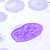

In [ ]:

imnum = 1010
cv2_imshow(x_all[imnum])


In [ ]:
img_flip_ud = cv2.flip(x_all[imnum], 0)
#horizontal flip
img_flip_lr = cv2.flip(x_all[imnum], 1)
img_rotate_180 = cv2.rotate(x_all[imnum], cv2.ROTATE_180)
img_rotate_90_CW = cv2.rotate(x_all[imnum], cv2.ROTATE_90_CLOCKWISE)

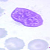

In [ ]:
cv2_imshow(img_flip_ud)

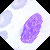

In [ ]:
from PIL import Image 
img  = Image.fromarray(x_all[imnum])
rotate_img= img.rotate(45)
cv2_imshow(np.array(rotate_img))

In [ ]:
x_all.shape

(1020, 50, 50, 3)

In [ ]:
from keras.utils import np_utils
feat_num=512
no_sample=x_all.shape
y_cat=[]
for i in y_all:
  if i=="L1":
    r=np.array([1, 0, 0 , 0])
  elif i == "L2":
    r=np.array([0, 1, 0 , 0])
  elif i == "L3":
      r=np.array([0, 0, 1 , 0])
  else:
    r=np.array([0, 0, 0, 1])
  y_cat.append(r)
y_cat=np.array(y_cat)

encoder = LabelEncoder()
encoder.fit(y_all)
encoded_Y = encoder.transform(y_all)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
y_cat = dummy_y
y_cat.shape

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1020, 4)

In [ ]:
xtrain, xtest, ytrain, ytest=train_test_split(x_all, y_cat, test_size=0.10)
datagen = ImageDataGenerator( zoom_range=[0.5,1.0], brightness_range=[0.2,1.0], width_shift_range=0.2, height_shift_range=0.2)
train_iterator = datagen.flow(xtrain, ytrain, batch_size=64)
test_iterator = datagen.flow(xtest, ytest, batch_size=64)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))
dim=(71, 71)

In [ ]:
pre_trained_model1 = VGG16(input_shape=(71, 71, 3), include_top=False, weights=None, classes=3)
last_layer = pre_trained_model1.get_layer('block5_pool')
last_output = last_layer.output
x = GlobalMaxPooling2D()(last_output)
x = Dense(32, activation='softmax')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)

model1 = Model(pre_trained_model1.input, x)


In [ ]:
def create_unet_model(feat_nim, input_image_size,
                        n_labels=3,
                        layers=6,
                        lowest_resolution=16,
                        convolution_kernel_size=(5,5),
                        deconvolution_kernel_size=(5,5),
                        pool_size=(2,2),
                        strides=(2,2),
                        output_activation='tanh',
                        init_lr=0.0001):
        number_of_classification_labels = n_labels
        layers = np.arange(layers)
        inputShape=(64, 64 , 3) #tuple(list(dim)+[3])
        inputs = Input(shape=inputShape)
        x=inputs
        encoding_convolution_layers = []
        pool = None
        for i in range(len(layers)):
            number_of_filters = lowest_resolution * 2**(layers[i])

            if i == 0:
                conv = Conv2D(filters=number_of_filters, kernel_size=convolution_kernel_size, activation='relu', padding='same')(x)
            else:
                conv = Conv2D(filters=number_of_filters, kernel_size=convolution_kernel_size, activation='relu', padding='same')(pool)

            encoding_convolution_layers.append(Conv2D(filters=number_of_filters, kernel_size=convolution_kernel_size,activation='relu', padding='same')(conv))
            
            if i < len(layers)-1:
                pool = MaxPooling2D(pool_size=pool_size)(encoding_convolution_layers[i])
            
        outputs = encoding_convolution_layers[len(layers)-1]
        for i in range(1,len(layers)):
            number_of_filters = lowest_resolution * 2**(len(layers)-layers[i]-1)
            deconv1 = Conv2DTranspose(filters=number_of_filters, kernel_size=deconvolution_kernel_size,
                                        padding='same')(outputs)
            deconv2 = UpSampling2D(size=pool_size)(deconv1)
            outputs = Concatenate(axis=3)([deconv2, encoding_convolution_layers[len(layers)-i-1]])

            outputs = Conv2D(filters=number_of_filters, kernel_size=convolution_kernel_size, 
                            activation='relu', padding='same')(outputs)
            outputs = Conv2D(filters=number_of_filters, kernel_size=convolution_kernel_size, 
                            activation='relu', padding='same')(outputs)

        outputs = Conv2D(filters=number_of_classification_labels, kernel_size=(1,1), activation=output_activation)(outputs)
        outputs = Flatten(name='flatten')(outputs)
        outputs = Dense(512, activation='softmax', name='fc1')(outputs)
        outputs =Dropout(0.5)(outputs)
        outputs = Dense(3, activation="softmax", name='classification_dense')(outputs)  
        unet_model = Model(inputs=inputs, outputs=outputs)
        #unet_model.compile(loss='mean_absolute_percentage_error', optimizer=Adam(learning_rate=init_lr) ,  metrics="accuracy")
        return unet_model
model_unet = create_unet_model(512, tuple(list((64,64))+[3]))

In [ ]:
pre_trained_model2 = ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(71, 71, 3),
    pooling=None,
    classes=4)#(input_shape=(128, 128, 3), include_top=False, weights="imagenet")
last_layer = pre_trained_model2.get_layer('conv5_block3_out')
last_output = last_layer.output
x = GlobalMaxPooling2D()(last_output)
x = Dense(64, activation='softmax')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)

model2 = Model(pre_trained_model2.input, x)

In [ ]:
dim= (71 , 71)
inputShape=tuple(list(dim)+[3])
inputs = Input(shape=inputShape)
base_model = Xception(weights=None, include_top=False, input_shape=inputShape)
outputs = base_model.output
n_labels=3
number_of_classification_labels = n_labels
outputs = Conv2D(filters=number_of_classification_labels, kernel_size=(1,1), activation='tanh')(outputs)
outputs = Flatten(name='flatten')(outputs)
#outputs = Dense(4096, activation='linear')(outputs)
#outputs =Dropout(0.5)(outputs)
#outputs = Dense(2048, activation='relu')(outputs)
#outputs =Dropout(0.5)(outputs)
#outputs = Dense(1024, activation='softmax')(outputs)
#outputs =Dropout(0.5)(outputs)
#outputs = Dense(512, activation='linear')(outputs)
outputs = Dense(64,name='regression_dense')(outputs)  
outputs =Dropout(0.5)(outputs)
prediction = Dense(4,activation="softmax")(outputs)
model_xception = Model(base_model.input, outputs=prediction , name="Xception")

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 14.6 MB/s eta 0:00:00


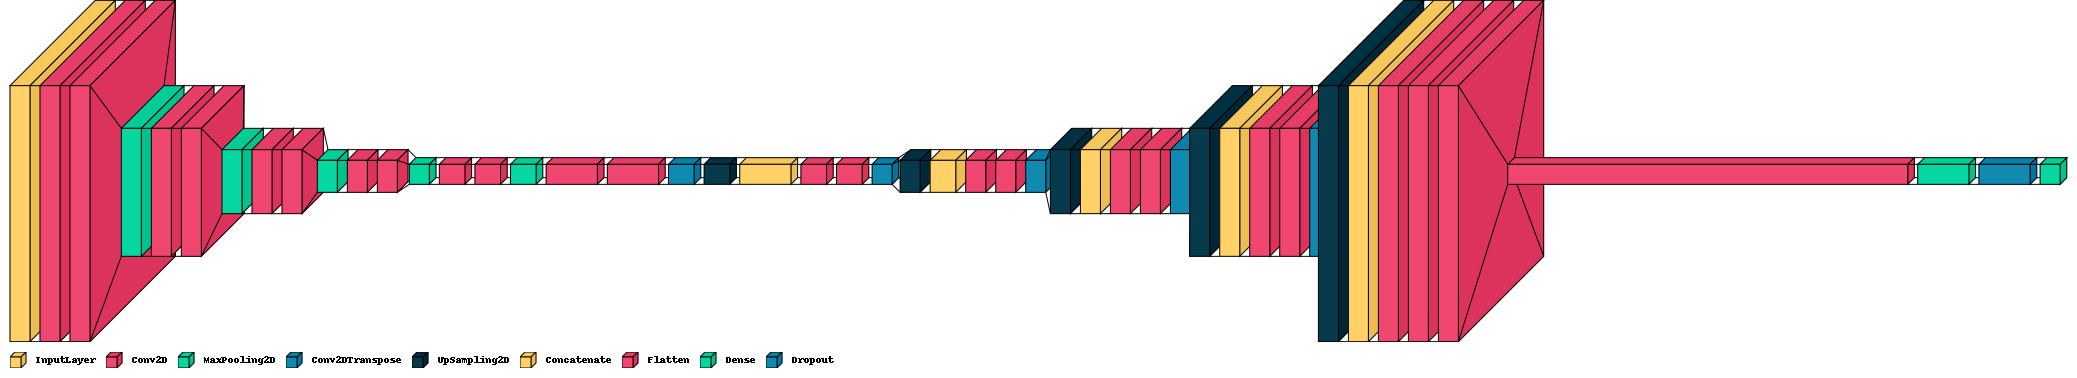

In [ ]:
import visualkeras
from PIL import ImageFont
#font = ImageFont.truetype(32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model_unet, legend=True)  # font is optional!


In [ ]:
def train_models(model,xtrain,ytrain,lossfunc,opt, metric, batchSize , epoch):
  model.compile(loss=lossfunc, optimizer=opt, metrics= metric)
  no_samples=xtrain.shape[0]
  if train_iterator.n < no_samples or test_iterator.n < no_samples:
    STEP_SIZE_TRAIN = 1
    STEP_SIZE_VALID = 1
  else:
      STEP_SIZE_TRAIN = train_iterator.n // train_iterator.batch_size
      STEP_SIZE_VALID = test_iterator.n // test_iterator.batch_size

  history = model.fit(train_iterator,
              validation_data=test_iterator,
              epochs=epoch,
              steps_per_epoch=STEP_SIZE_TRAIN,
              validation_steps=STEP_SIZE_VALID)
  
  return history, model

In [ ]:
opt =Adam(learning_rate=0.0001, amsgrad=False)

xtrain=xtrain
ytrain=ytrain
metric= ['accuracy']
lossfunc='mse'
epoch=20
BatchSize=8

In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 71, 71, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 71, 71, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 71, 71, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 35, 35, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 35, 35, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 35, 35, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 17, 17, 128)       0     

In [ ]:
	# define the model input

inputShape = tuple(list(dim)+[3])
chanDim=-1
inputs = Input(shape=inputShape)
filters=(16, 32, 64)
#for (i, f) in enumerate(filters):
#		if i == 0:
x = inputs
x = Conv2D(32, (3, 3), padding="same")(x)
x = Activation("relu")(x)
x = BatchNormalization(axis=chanDim)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(64)(x)
x = Activation("relu")(x)
x = BatchNormalization(axis=chanDim)(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x)
x = Dense(feat_num, activation='linear')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation="relu")(x)
model_ann = Model(inputs, x)

In [ ]:
history1, model1 = train_models(model1,xtrain,ytrain,lossfunc,opt, metric, BatchSize , epoch)

In [ ]:
history2, model2 = train_models(model2,xtrain,ytrain,lossfunc,opt, metric, BatchSize , epoch)

In [ ]:
os.chdir('/content/drive/MyDrive/Goodarzi/models')
from tensorflow.keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("weights.h5")
inputShape=tuple(list(dim)+[3])
inputs = Input(shape=inputShape)
loaded_model
#print(loaded_model.output)
loaded_model.layers.pop()
model = Model(inputs=loaded_model.inputs, outputs=loaded_model.layers[-3].output)
outputs=model.output
#print(model.summary())
outputs = Dense(32,activation="softmax")(outputs)  
#outputs =Dropout(0.5)(outputs)
outputs = Dense(4,activation="softmax")(outputs)
prediction = Dense(4,activation="softmax")(outputs)
model_pre = Model(model.input, outputs=prediction , name="Pretrained")


In [ ]:
history3, model3 = train_models(model_pre,xtrain,ytrain,lossfunc,opt, metric, BatchSize , epoch)

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 16.0 MB/s 


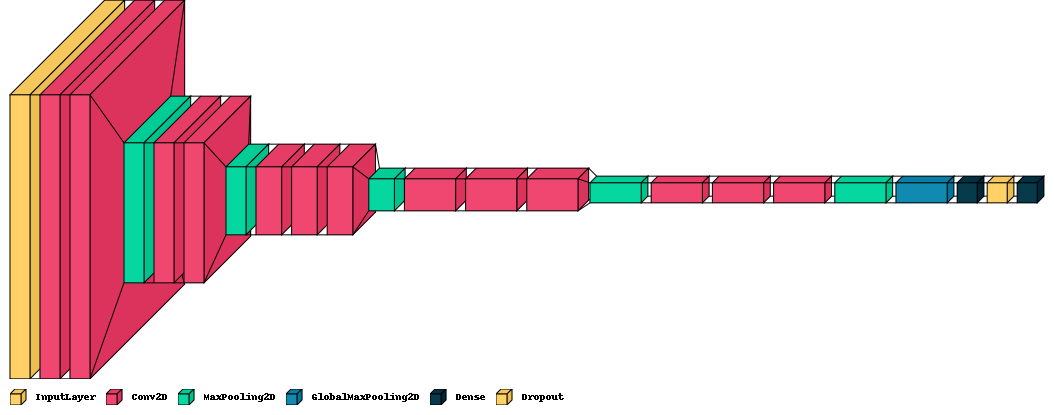

In [ ]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model1, legend=True)
im=visualkeras.layered_view(model1, legend=True)
im

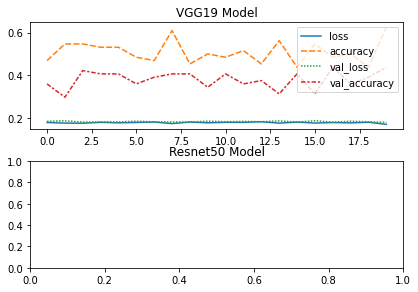

In [ ]:
df1 = pd.DataFrame.from_dict(history3.history)
#df2 = pd.DataFrame.from_dict(history2.history)
fig, ax = plt.subplots(2,1)
plt.tight_layout()
ax1=sns.lineplot(data=df1,ax = ax[0])
#ax2=sns.lineplot(data=df2,ax = ax[1])
ax[0].set_title("VGG19 Model")
ax[1].set_title("Resnet50 Model")
plt.savefig("/content/drive/MyDrive/Goodarzi/ParallelModel.png")

In [ ]:
def extractFeatures(X,model):
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    print(model.summary())

    # feature extraction from photos
    features = []
    i=0
    for x in X:
        x = x.reshape((1, x.shape[0], x.shape[1], x.shape[2]))
        x = preprocess_input(x)
        features.append(model.predict(x, verbose = 0))
        i+=1
        print(i)
    features=np.array(features)
    return features
feats1 = extractFeatures(xtrain,model1)
feats2 = extractFeatures(xtrain,model2)

In [ ]:
feats1.shape

(270, 1, 3)

In [ ]:
feats1=np.array(feats1)
XtrainNew1=feats1.reshape(feats1.shape[0],feats1.shape[2])
feats2=np.array(feats2)
XtrainNew2=feats2.reshape(feats2.shape[0],feats2.shape[2])
XtrainNew=np.concatenate((XtrainNew1, XtrainNew2), axis=1)
XtrainNew.shape

(270, 6)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
#from sklearn.linear_model import LinearClassifier
from sklearn.multioutput import MultiOutputClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from numpy import mean
from numpy import std
from collections import OrderedDict

In [ ]:

XtestNew1 = extractFeatures(xtest,model1)
XtestNew2 = extractFeatures(xtest,model1)
XtestNew1=XtestNew1.reshape(XtestNew1.shape[0],XtestNew1.shape[2])
XtestNew2=XtestNew2.reshape(XtestNew2.shape[0],XtestNew2.shape[2])
XtestNew=np.concatenate((XtestNew1, XtestNew2), axis=1)

In [ ]:
r1 = MultiOutputClassifier(AdaBoostClassifier(n_estimators=35))
r2 = MultiOutputClassifier(RandomForestClassifier(n_estimators=35))
reg_model1=r1.fit(XtrainNew,ytrain)
reg_model2=r2.fit(XtrainNew,ytrain)
response1 = reg_model1.predict(XtestNew)
response2 = reg_model2.predict(XtestNew)

In [ ]:
RANDOM_STATE = 123
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))]


# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 275
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(XtrainNew, ytrain)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("error rate")
plt.legend(loc="upper right")
plt.show()

In [ ]:
cf_matrix = confusion_matrix(ytest.argmax(axis=1), response1.argmax(axis=1))
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')

In [ ]:
cf_matrix = confusion_matrix(ytest.argmax(axis=1), response2.argmax(axis=1))
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')

In [ ]:
!pip install sklearn-genetic

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
#from genetic_selection import GeneticSelectionCV
y_label=[]
y_label_test=[]
for i in ytrain:
  if i[0]==1:
    r=1
  elif i[1]==1:
    r=2
  else:
    r=3
  y_label.append(r)
y_label=np.array(y_label)

y_label_test=[]
for i in ytest:
  if i[0]==1:
    r=1
  elif i[1]==1:
    r=2
  else:
    r=3
  y_label_test.append(r)
y_label_test=np.array(y_label_test)
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=1, random_state=1235),
    SVC(gamma=.1, C=1, random_state=1235),
    DecisionTreeClassifier(max_depth=5, random_state=1235),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=1235),
    MLPClassifier(alpha=1, max_iter=1000, random_state=1235),
    AdaBoostClassifier(random_state=1235),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


In [ ]:
pip install mrmr_selection

In [ ]:
import mrmr
X = pd.DataFrame(XtrainNew)
y = pd.Series(y_label)

# select top 10 features using mRMR
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=X, y=y, K=40)

100%|██████████| 3/3 [00:00<00:00, 54.14it/s]


In [ ]:
X_train_new=[]
X_test_new=[]
j=0
for i in selected_features:
  if i :
    X_train_new.append(XtrainNew[:,i])
    X_test_new.append(XtestNew[:,i])
    j+=1
X_train_new=np.array(X_train_new)
X_train_new=X_train_new.T
print(X_train_new.shape)


X_test_new=np.array(X_test_new)
X_test_new=X_test_new.T
print(X_test_new.shape)

(270, 2)
(30, 2)


In [ ]:
i=0
for clf in classifiers:
  clf.fit(X_train_new, y_label)
  y_pred = clf.predict(X_train_new)
  specifity_train=recall_score(y_label, y_pred, average='micro')
  sensitivity_train=recall_score(y_label, y_pred,average='micro')
  f1_train=f1_score(y_label, y_pred, average='micro')
  precision_train=precision_score(y_label, y_pred, average='micro')
  acc_train=accuracy_score(y_label, y_pred)
  dict_train={'Accuracy': acc_train, 'Sensitivity': sensitivity_train, 'Specifity': specifity_train, 'Precision': precision_train, 'f1 Score': f1_train}

  clf.fit(X_test_new,y_label_test)
  y_pred = clf.predict(X_test_new)
  specifity_test=recall_score(y_label_test, y_pred, average='micro')
  sensitivity_test=recall_score(y_label_test, y_pred, average='micro')
  f1_test=f1_score(y_label_test, y_pred, average='micro')
  precision_test=precision_score(y_label_test, y_pred, average='macro')
  acc_test=accuracy_score(y_label_test, y_pred)
  dict_test={'Accuracy': acc_test, 'Sensitivity': sensitivity_test, 'Specifity': specifity_test, 'Precision': precision_test, 'f1 Score': f1_test}
  classification_model=pd.DataFrame([dict_train,dict_test],index = ['Train', 'Test'])
  out=[]
  print(f'{names[i]} Method')
  print(pd.DataFrame.from_dict(classification_model))
  print("*********************************")
  i+=1

Nearest Neighbors Method
       Accuracy  Sensitivity  Specifity  Precision  f1 Score
Train  0.344444     0.344444   0.344444   0.344444  0.344444
Test   0.366667     0.366667   0.366667   0.438131  0.366667
*********************************
Linear SVM Method
       Accuracy  Sensitivity  Specifity  Precision  f1 Score
Train  0.344444     0.344444   0.344444   0.344444  0.344444
Test   0.433333     0.433333   0.433333   0.144444  0.433333
*********************************
RBF SVM Method
       Accuracy  Sensitivity  Specifity  Precision  f1 Score
Train  0.344444     0.344444   0.344444   0.344444  0.344444
Test   0.433333     0.433333   0.433333   0.144444  0.433333
*********************************
Decision Tree Method
       Accuracy  Sensitivity  Specifity  Precision  f1 Score
Train  0.344444     0.344444   0.344444   0.344444  0.344444
Test   0.433333     0.433333   0.433333   0.144444  0.433333
*********************************
Random Forest Method
       Accuracy  Sensitivity  Sp

In [ ]:
accuracy_score(ytest, response1)

0.0

In [ ]:
!pip install autokeras


In [ ]:
import autokeras as ak

In [ ]:
input_node = ak.ImageInput()
output_node = ak.ImageBlock(
    # Only search ResNet architectures.
    block_type="resnet",
    # Normalize the dataset.
    normalize=True,
    # Do not do data augmentation.
    augment=False,
)(input_node)
output_node = ak.ClassificationHead()(output_node)
clf = ak.AutoModel(
    inputs=input_node, outputs=output_node, overwrite=True, max_trials=1
)
clf.fit(xtrain, ytrain, epochs=10)